# Margem Máxima com Perceptron

In [30]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from utils import make_normal_data

# Dados Sintéticos

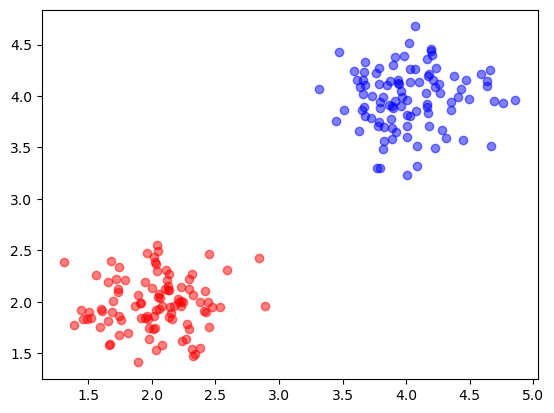

In [31]:
s1 = 0.3
s2 = 0.3
c1 = np.array([2,2])
c2 = np.array([4,4])
n1 = 100
n2 = 100
x1, y1 = make_normal_data(s = s1, n = n1, c = c1, dim = 2, label = 1)
x2, y2 = make_normal_data(s = s2, n = n2, c = c2, dim = 2, label = -1)
xall = np.vstack((x1, x2))
yall = np.hstack((y1, y2))
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

# Perceptron

In [ ]:
def calc_margin_braga(w, X_aug):
    margins = X_aug @ w

    # Índice do maior margin negativo
    neg_margins = margins[margins < 0]
    if neg_margins.size > 0:
        max_neg = np.max(neg_margins)
        imax_neg = np.where(margins == max_neg)[0][0]
    else:
        imax_neg = None

    # Índice do menor margin positivo
    pos_margins = margins[margins > 0]
    if pos_margins.size > 0:
        min_pos = np.min(pos_margins)
        imin_pos = np.where(margins == min_pos)[0][0]
    else:
        imin_pos = None

    return imax_neg, imin_pos, margins

def perceptron(xall, yall, max_iter=5000, eta = 0.1):
    """
    Implementação do algoritmo Perceptron.
    """
    X_aug = np.hstack((np.ones(xall.shape[0]).reshape(-1, 1), xall))
    w = np.zeros(X_aug.shape[1])
    for epoch in range(max_iter):
        updated = False
        indices = np.random.permutation(X_aug.shape[0])

        for i in indices:
            if yall[i] * (w @ X_aug[i, :]) <= 0:
                err = yall[i] * X_aug[i, :]
                w += eta * err
                updated = True

        if not updated:
            print("Converged.")
            break

    return w

def L2_perceptron(xall, yall, max_iter=5000, eta = 0.1, lambda_ = 0.1):
    """
    Implementação do algoritmo Perceptron com regularização L2.
    """
    X_aug = np.hstack((np.ones(xall.shape[0]).reshape(-1, 1), xall))
    w = np.zeros(X_aug.shape[1])
    for epoch in range(max_iter):
        updated = False
        indices = np.random.permutation(X_aug.shape[0])

        for i in indices:
            if yall[i] * (w @ X_aug[i, :]) <= 0:
                err = yall[i] * X_aug[i, :]
                L2 = lambda_ * w
                w += eta * (err - L2)
                updated = True

        if not updated:
            print("Converged.")
            break

    

    return w
    

Converged.
Pesos: [ 0.4        -0.08308191 -0.06724462]
Margens: Maxima Negativa: -0.13
	 Minima Positiva: 0.00


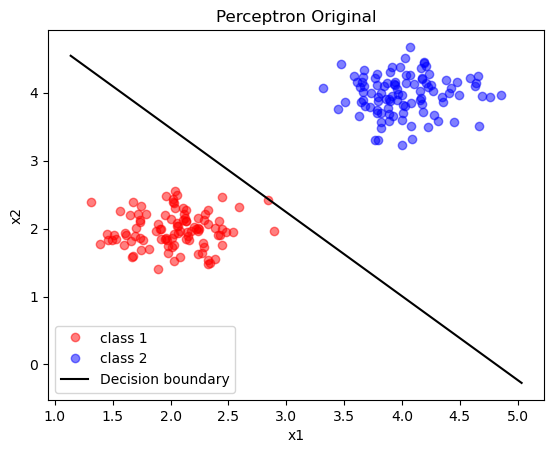

In [53]:
np.random.seed(123)
# Plot dos dados de treinamento
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

# Treinamento do Perceptron
w = perceptron(xall, yall, max_iter=1000, eta = 0.1)
print(f"Pesos: {w}")

# Hiperplano de decisão: w0 + w1*x + w2*y = 0 → y = -(w0 + w1*x)/w2
x_min, x_max = plt.xlim()
x1_min, x1_max = plt.ylim()
xx = np.linspace(x_min, x_max, 100)
y = -(w[0] + w[1] * xx) / w[2]
plt.plot(xx, y, 'k-', label = 'Decision boundary')

# Cálculo da margem
X_aug = np.hstack((np.ones(xall.shape[0]).reshape(-1, 1), xall))
imax_neg, imin_pos, margins = calc_margin_braga(w, X_aug)
print(f"Margens: Maxima Negativa: {margins[imax_neg]:.2f}")
print(f"\t Minima Positiva: {margins[imin_pos]:.2f}")
plt.title("Perceptron Original")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

Converged.
Pesos: [ 0.37785621 -0.06965401 -0.05940617]
Margens: Maxima Negativa: -0.08
	 Minima Positiva: 0.04


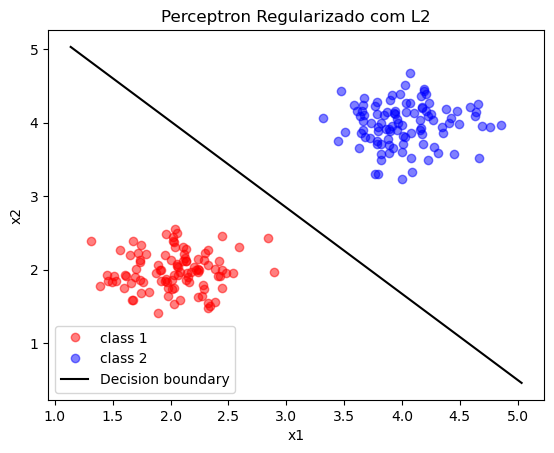

In [52]:
np.random.seed(123)
# Plot dos dados de treinamento
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

# Treinamento do Perceptron
w = L2_perceptron(xall, yall, max_iter=1000, eta = 0.1, lambda_ = 0.1)
print(f"Pesos: {w}")

# Hiperplano de decisão: w0 + w1*x + w2*y = 0 → y = -(w0 + w1*x)/w2
x_min, x_max = plt.xlim()
x1_min, x1_max = plt.ylim()
xx = np.linspace(x_min, x_max, 100)
y = -(w[0] + w[1] * xx) / w[2]
plt.plot(xx, y, 'k-', label = 'Decision boundary')

# Cálculo da margem
X_aug = np.hstack((np.ones(xall.shape[0]).reshape(-1, 1), xall))
imax_neg, imin_pos, margins = calc_margin_braga(w, X_aug)
print(f"Margens: Maxima Negativa: {margins[imax_neg]:.2f}")
print(f"\t Minima Positiva: {margins[imin_pos]:.2f}")
plt.title("Perceptron Regularizado com L2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()